# Comparing clustering algorithms using Python

In this assignment, we will be comparing 3 clustering algorithms:

1. Kmeans
2. Meanshift
3. DBSCAN
4. Agglomerative
5. Spectral

We will be using iris dataset from scikit learn package.

## 1. Import required packages

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.cluster import MeanShift
from sklearn.metrics import confusion_matrix
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set()

C:\Users\satis\Anaconda3\envs\py369\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## 2. Load Data

You can find the dataset here http://archive.ics.uci.edu/ml/datasets/Iris

In [2]:
from sklearn.datasets import load_iris

iris = load_iris()

In [3]:
data = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                     columns= iris['feature_names'] + ['target'])

In [4]:
data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


Separate Input and output.

In [5]:
X = data[['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']]

y = data[['target']]

In [6]:
X

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [8]:
data['target'].unique()

array([0., 1., 2.])

Now that we have separated input and output, we can apply clustering on input data i.e. X. Also, the dataset is does not contain outlier and is properly scaled. So we do not need to preprocess the data.

## 3. ELBOW method to verify the number of clusters

We are going to plot k i.e. number of clusters against the distortion to verify the number of clusters. The ideal output should be 3 as the number of output class for the dataset is 3.

In [16]:
from scipy.spatial.distance import cdist
import numpy as np
import matplotlib.pyplot as plt

distortions=[]

K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(X)
    kmeanModel.fit(X)
    distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0])

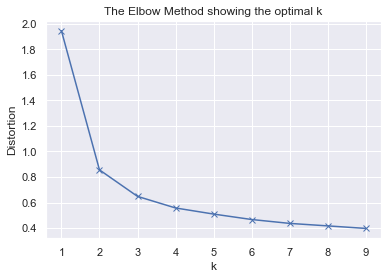

In [17]:
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

As you can observe, at k=3 the elbow shape is formed and is inline with the number of categories the dataset has i.e. 3

refer cell [14]

## 4. Implementing clustering Algorithms

We will be using k=3 for all the algorithms

Lets visualize the data before clustering the data using algorithms. We will use PCA algorithm to reduce the features to 2.

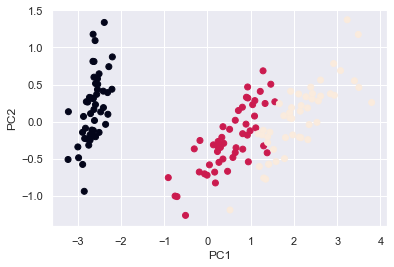

In [23]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2).fit(X)
pca_2d = pca.transform(X)
y=iris.target

plt.scatter(pca_2d[:,0], pca_2d[:,1], c = y)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

### 4.1 Kmeans

In [25]:
kmeans = KMeans(n_clusters=3, init = 'k-means++', max_iter = 100, random_state = 5)
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=100,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=5, tol=0.0001, verbose=0)

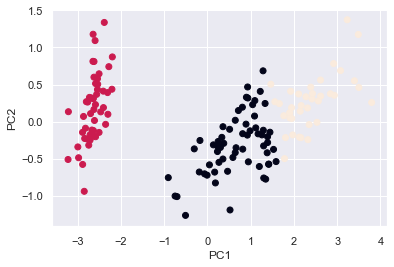

In [26]:
plt.scatter(pca_2d[:,0], pca_2d[:,1], c = kmeans.labels_)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

As you can observe, the boundaries for the clusters are clearly defined and there are no overlaping elements.

### 4.2 Meanshift

In [45]:
meanshift=MeanShift(bandwidth=None, bin_seeding=False, cluster_all=True, min_bin_freq=1, n_jobs=1, seeds= None).fit(X)

In [46]:
meanshift.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

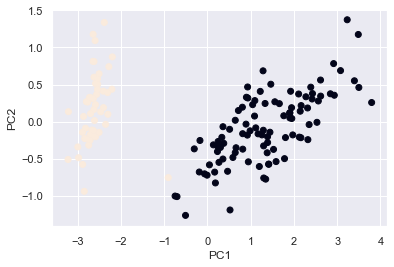

In [47]:
plt.scatter(pca_2d[:,0], pca_2d[:,1], c = meanshift.labels_)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

This algorithm, like DBSCAN, doesn’t require you to specify the number of clusters, or any other parameters, when you create the model. Hence, it predicts only 2 clusters as we did not explicitly specify the number of clusters (k).

### 4.3 DBSCAN

In [58]:
dbscan = DBSCAN(eps=0.5, metric='euclidean', min_samples=5).fit(X)

In [60]:
dbscan.labels_

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  1,
        1,  1,  1,  1,  1,  1, -1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,
       -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1, -1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1, -1,  1,  1,  1,
        1,  1,  1, -1, -1,  1, -1, -1,  1,  1,  1,  1,  1,  1,  1, -1, -1,
        1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1, -1, -1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1],
      dtype=int64)

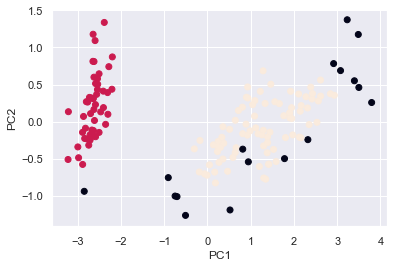

In [61]:
plt.scatter(pca_2d[:,0], pca_2d[:,1], c = dbscan.labels_)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

As you can observe, DBSCAN algorithm does not perform well in terms of creating distinct clusters.

### 4.4 Agglomerative Clustering

Agglomerative clustering is a clustering technique in which each node first starts in its own cluster, and then pairs of clusters recursively merge together in a way that minimally increases a given linkage distance.We can specify the number of clusters and the type of method to be used to compute distance.

In [65]:
from sklearn.cluster import AgglomerativeClustering
agg_clustering = AgglomerativeClustering(n_clusters=3, linkage="ward").fit(X)

In [73]:
agg_clustering.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int64)

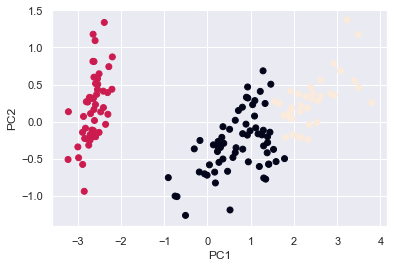

In [75]:
plt.scatter(pca_2d[:,0], pca_2d[:,1], c = agg_clustering.labels_)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

### 4.5 Spectral Clustering

Spectral clustering is a technique that applies clustering to the normalized Laplacian projections.

In [78]:
from sklearn.cluster import SpectralClustering

spectral_clustering = SpectralClustering(n_clusters=3, assign_labels="discretize",random_state=0).fit(X)

In [79]:
spectral_clustering.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2], dtype=int64)

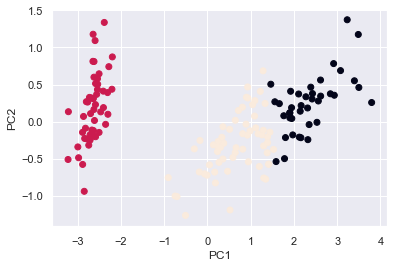

In [80]:
plt.scatter(pca_2d[:,0], pca_2d[:,1], c = spectral_clustering.labels_)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

Spectral clustering does a decent job of creating distinct clusters but it is best suited for clustering image data.

## 5. Metric Evaluation: 

### Adjusted Rand Score

Adjusted Rand Score computes a similarity measure between two clusters. ARS considers all pairs of samples and counts pairs that are assigned in the same or different clusters in the predicted and true clusters.

In [92]:
from sklearn.metrics.cluster import adjusted_rand_score
ars_results={}

ars_results['Kmeans'] = adjusted_rand_score(iris.target,kmeans.labels_)*100
ars_results['Agglomerative'] = adjusted_rand_score(iris.target,agg_clustering.labels_)*100
ars_results['DBSCAN'] = adjusted_rand_score(iris.target,dbscan.labels_)*100
ars_results['Meanshift'] = adjusted_rand_score(iris.target,meanshift.labels_)*100
ars_results['Spectral'] = adjusted_rand_score(iris.target,spectral_clustering.labels_)*100

print('Kmeans: {}'.format(adjusted_rand_score(iris.target,kmeans.labels_)))
print('Agglomerative: {}'.format(adjusted_rand_score(iris.target,agg_clustering.labels_)))
print('DBSCAN: {}'.format(adjusted_rand_score(iris.target,dbscan.labels_)))
print('Meanshift: {}'.format(adjusted_rand_score(iris.target,meanshift.labels_)))
print('Spectral: {}'.format(adjusted_rand_score(iris.target,spectral_clustering.labels_)))

Kmeans: 0.7302382722834697
Agglomerative: 0.7311985567707745
DBSCAN: 0.5206185241703302
Meanshift: 0.5583714437541352
Spectral: 0.7436826319432357


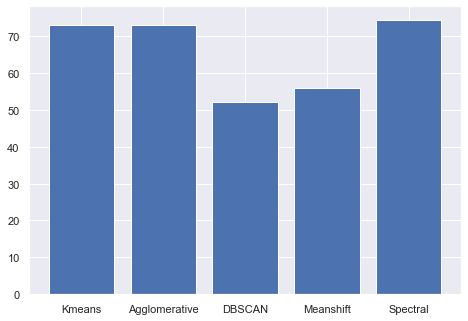

In [93]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
algo = ars_results.keys()
ars_value = ars_results.values()
ax.bar(algo,ars_value)
plt.show()

## 6. Conclusion

As you can observe from the above graph, Kmean, agglomerative and spectral perform with almost similar adjusted rand score while meanshift is slightly better than DBSCAN and DBSCAN is last on performance index.